## 1. EDA & Data Cleaning

##  1.5 Análisis de la Demografía de los Clientes

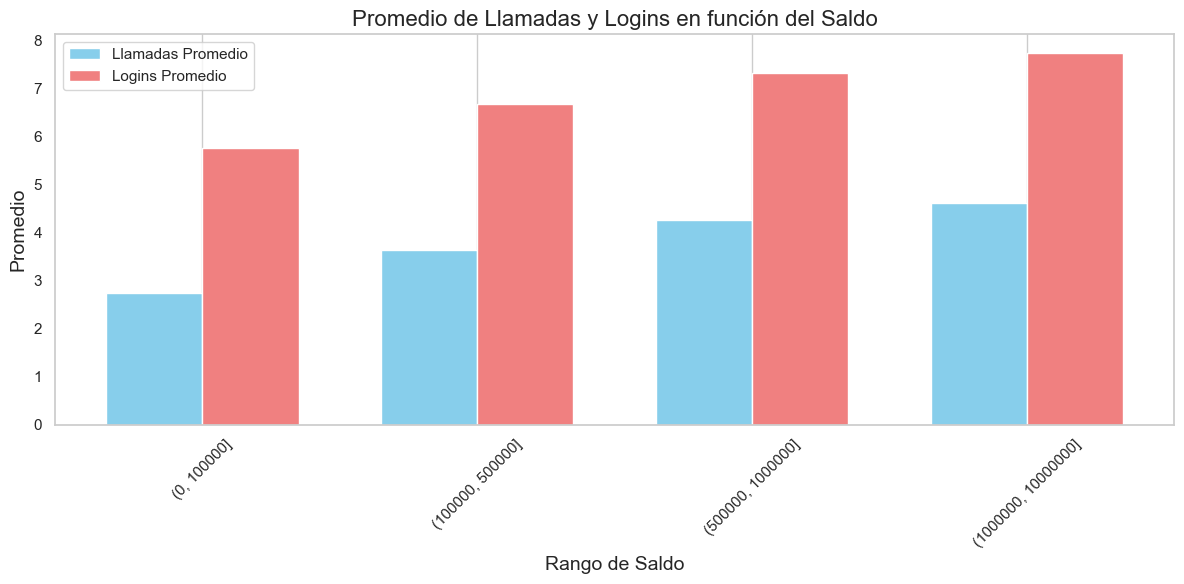

In [2236]:
call_login_analysis = pd.DataFrame({
    'calls_6_mnth': [2.732145, 3.624848, 4.261202, 4.614339],
    'logons_6_mnth': [5.764751, 6.672235, 7.324590, 7.736712]
}, index=pd.Index(['(0, 100000]', '(100000, 500000]', '(500000, 1000000]', '(1000000, 10000000]'], name='bal'))

# Reiniciar el índice para facilitar el uso
call_login_analysis.reset_index(inplace=True)

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras
bar_width = 0.35  # ancho de las barras
x = range(len(call_login_analysis))

# Barras de llamadas promedio
plt.bar(x, call_login_analysis['calls_6_mnth'], width=bar_width, color='skyblue', label='Llamadas Promedio')

# Barras de logins promedio, desplazadas a la derecha
plt.bar([p + bar_width for p in x], call_login_analysis['logons_6_mnth'], width=bar_width, color='lightcoral', label='Logins Promedio')

# Configuración de ejes
plt.title('Promedio de Llamadas y Logins en función del Saldo', fontsize=16)
plt.xlabel('Rango de Saldo', fontsize=14)
plt.ylabel('Promedio', fontsize=14)
plt.xticks([p + bar_width / 2 for p in x], call_login_analysis['bal'], rotation=45)  # Ajustar las etiquetas en el eje x
plt.legend()

# Mostrar el gráfico
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [2237]:
correlation_age_accounts = df_demo['clnt_age'].corr(df_demo['num_accts'])
print("Correlación entre Edad y Número de Cuentas:", correlation_age_accounts)


Correlación entre Edad y Número de Cuentas: -0.018437140385588087


In [2238]:
import pandas as pd
import numpy as np

# Definición de grupos de edad
age_bins = [0, 30, 45, 60, 100]
age_labels = ['Joven', 'Adulto', 'Mayor', 'Anciano']
df_demo['age_group'] = pd.cut(df_demo['clnt_age'], bins=age_bins, labels=age_labels)

# Calcular la tenencia promedio de cuentas por grupo de edad
avg_accounts_by_age_group = df_demo.groupby('age_group')['num_accts'].mean()
print(avg_accounts_by_age_group)


age_group
Joven      2.268381
Adulto     2.254144
Mayor      2.253840
Anciano    2.232956
Name: num_accts, dtype: float64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_122420\4276560200.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_accounts_by_age_group = df_demo.groupby('age_group')['num_accts'].mean()


In [2239]:
import pandas as pd
import numpy as np

# Definición de grupos de edad
age_bins = [0, 30, 45, 60, 100]
age_labels = ['Joven', 'Adulto', 'Mayor', 'Anciano']
df_demo['age_group'] = pd.cut(df_demo['clnt_age'], bins=age_bins, labels=age_labels)

# Calcular la tenencia promedio de cuentas por grupo de edad
avg_accounts_by_age_group = df_demo.groupby('age_group')['num_accts'].mean()
print(avg_accounts_by_age_group)

# Definir grupos de clientes: Nuevos vs. Antiguos
df_demo['client_status'] = np.where(df_demo['clnt_tenure_yr'] < 5, 'Nuevos', 'Antiguos')

# Calcular estadísticas para cada grupo
client_analysis = df_demo.groupby('client_status').agg({
    'bal': 'mean',               # Saldo promedio
    'calls_6_mnth': 'mean',      # Llamadas promedio en 6 meses
    'logons_6_mnth': 'mean',     # Inicios de sesión promedio en 6 meses
    'num_accts': 'mean'          # Número promedio de cuentas
}).reset_index()

# Mostrar resultados
print(client_analysis)


age_group
Joven      2.268381
Adulto     2.254144
Mayor      2.253840
Anciano    2.232956
Name: num_accts, dtype: float64
  client_status            bal  calls_6_mnth  logons_6_mnth  num_accts
0      Antiguos  162770.299486      3.107741       6.147879   2.252732
1        Nuevos   91187.555663      3.027335       6.065490   2.217255


C:\Users\Usuario\AppData\Local\Temp\ipykernel_122420\4201426352.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_accounts_by_age_group = df_demo.groupby('age_group')['num_accts'].mean()


In [ ]:
demographics_balance = df_demo.groupby(['clnt_age', 'gendr'])['bal'].describe()
demographics_balance


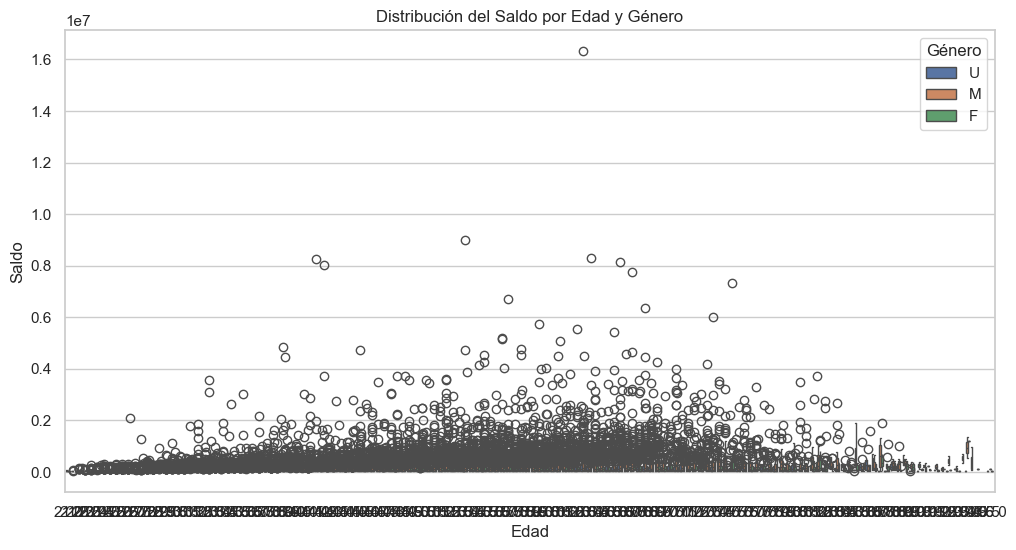

In [2241]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_demo, x='clnt_age', y='bal', hue='gendr')
plt.title('Distribución del Saldo por Edad y Género')
plt.xlabel('Edad')
plt.ylabel('Saldo')
plt.legend(title='Género')
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_122420\3101238905.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_balance_by_age_group = df_demo.groupby('age_group')['bal'].mean().reset_index()


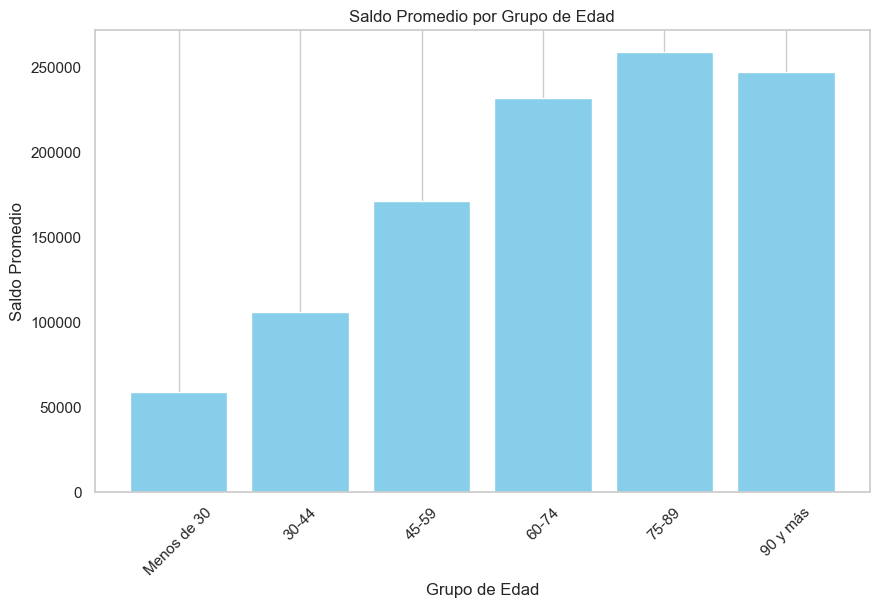

In [2242]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df_demo es tu DataFrame con las columnas 'clnt_age' y 'bal'

# Paso 1: Crear grupos de edad
age_bins = [0, 30, 45, 60, 75, 90, 100]  
age_labels = ['Menos de 30', '30-44', '45-59', '60-74', '75-89', '90 y más']
df_demo['age_group'] = pd.cut(df_demo['clnt_age'], bins=age_bins, labels=age_labels)

# Paso 2: Calcular el saldo promedio por grupo de edad
avg_balance_by_age_group = df_demo.groupby('age_group')['bal'].mean().reset_index()

# Paso 3: Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.bar(avg_balance_by_age_group['age_group'], avg_balance_by_age_group['bal'], color='skyblue')
plt.title('Saldo Promedio por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Saldo Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()
